In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import sklearn
import joblib

In [2]:
filepath = 'processed_csv/'
name = '_processed.csv'
def import_csv(battery_id, ambient_temp):
    dataframe = pd.read_csv((filepath+battery_id+name), index_col = 0)
    dataframe['cell'] = battery_id
    dataframe['ambient_temp'] = ambient_temp
    return dataframe

In [3]:
battery_ids = ['B0005', 'B0006', 'B0007', 'B0018']
dataframes_24 = []
for battery_id in battery_ids:
    dataframes_24.append(import_csv(battery_id, 24))

In [4]:
df_temp_24 = pd.concat(dataframes_24)
df_temp_24.reset_index(inplace=True)
df_temp_24.drop(["index"], axis=1, inplace=True)
df_temp_24.drop(['remaining_cycles','max_temp_C'], axis=1, inplace=True)
df_temp_24

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,capacity,cell,ambient_temp
0,3366.781,38.982181,0.004352,3287.969,-0.000339,1006.094,1.856487,B0005,24
1,3348.735,39.033398,0.004281,3269.688,-0.000341,3447.609,1.846327,B0005,24
2,3329.281,38.818797,0.004231,3250.437,-0.000341,3419.156,1.835349,B0005,24
3,3329.500,38.762305,0.004237,3250.563,-0.000342,3421.593,1.835263,B0005,24
4,3327.531,38.665393,0.004250,3248.766,-0.000342,3395.125,1.834646,B0005,24
...,...,...,...,...,...,...,...,...,...
631,2513.250,38.847490,0.006019,2375.953,-0.000462,2217.719,1.362737,B0018,24
632,2487.563,38.802834,0.005931,2377.500,-0.000462,2199.828,1.363405,B0018,24
633,2481.078,38.726991,0.006112,2343.109,-0.000463,2165.250,1.351865,B0018,24
634,2500.703,38.671920,0.006106,2348.656,-0.000465,2195.156,1.354797,B0018,24


In [5]:
battery_ids = ['B0049', 'B0050', 'B0051', 'B0053', 'B0054', 'B0055', 'B0056']
dataframes_4 = []
for battery_id in battery_ids:
    dataframes_4.append(import_csv(battery_id, 4))

In [6]:
df_temp_4 = pd.concat(dataframes_4)
df_temp_4.reset_index(inplace=True)
df_temp_4.drop(["index"], axis=1, inplace=True)
df_temp_4.drop(['remaining_cycles','max_temp_C'], axis=1, inplace=True)
df_temp_4

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,capacity,cell,ambient_temp
0,1473.328,16.270513,0.007276,1217.453,-0.000205,988.563,0.858373,B0049,4
1,2291.062,13.741555,0.008361,2234.437,-0.000414,101.656,1.420906,B0049,4
2,2297.109,13.429040,0.007559,2240.031,-0.000571,101.172,1.372852,B0049,4
3,1769.031,14.962434,0.013949,3490.797,0.000369,1291.468,2.378644,B0049,4
4,2197.344,20.530530,0.009691,1589.719,-0.000628,1483.719,1.060536,B0049,4
...,...,...,...,...,...,...,...,...,...
425,328.187,8.905384,0.007373,1828.187,-0.000570,107.250,1.130219,B0056,4
426,NaN,NaN,NaN,1730.437,-0.000521,107.968,1.125872,B0056,4
427,470.609,9.601768,0.006927,1799.062,-0.000531,684.313,1.143011,B0056,4
428,435.406,9.474135,0.007005,1812.281,-0.000524,110.094,1.137273,B0056,4


## Outlier Detection

### Ambient Temperature = 24 C

In [7]:
df_temp_24.corr()

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,capacity,ambient_temp
time_for_max_temp_D,1.000000,-0.509937,-0.938845,0.998900,0.951272,0.871524,0.997255,NaN
max_temp_D,-0.509937,1.000000,0.735812,-0.527029,-0.550087,-0.503261,-0.534157,NaN
slope_temp_D,-0.938845,0.735812,1.000000,-0.945828,-0.945628,-0.845329,-0.948982,NaN
time_voltage_measured_below3_D,0.998900,-0.527029,-0.945828,1.000000,0.955940,0.873168,0.999098,NaN
slope_voltage_measured_D,0.951272,-0.550087,-0.945628,0.955940,1.000000,0.845816,0.956260,NaN
time_for_max_temp_C,0.871524,-0.503261,-0.845329,0.873168,0.845816,1.000000,0.869963,NaN
capacity,0.997255,-0.534157,-0.948982,0.999098,0.956260,0.869963,1.000000,NaN
ambient_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 24.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 24.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 24.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


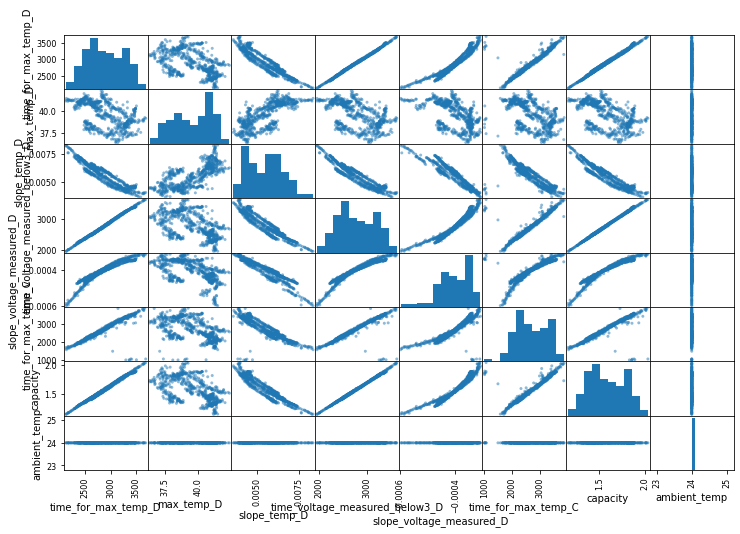

In [8]:
attributes = df_temp_24.columns
scatter_matrix(df_temp_24[attributes], figsize=(12,8))
plt.show()

In [9]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=100, contamination=0.03, warm_start=True, random_state=42)
outlier_locs = clf.fit_predict(df_temp_24[['time_for_max_temp_C', 'capacity']])  # fit the added trees 
print(outlier_locs)

[-1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [10]:
indices = [i for i, x in enumerate(outlier_locs) if x == -1]
indices

[0,
 31,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 199,
 331,
 332,
 333,
 334,
 335,
 336,
 367,
 504,
 549,
 559]

In [11]:
df_temp_24.drop(indices, inplace=True)

In [12]:
df_temp_24

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,capacity,cell,ambient_temp
1,3348.735,39.033398,0.004281,3269.688,-0.000341,3447.609,1.846327,B0005,24
2,3329.281,38.818797,0.004231,3250.437,-0.000341,3419.156,1.835349,B0005,24
3,3329.500,38.762305,0.004237,3250.563,-0.000342,3421.593,1.835263,B0005,24
4,3327.531,38.665393,0.004250,3248.766,-0.000342,3395.125,1.834646,B0005,24
5,3329.047,38.751695,0.004274,3250.203,-0.000340,3422.047,1.835662,B0005,24
...,...,...,...,...,...,...,...,...,...
631,2513.250,38.847490,0.006019,2375.953,-0.000462,2217.719,1.362737,B0018,24
632,2487.563,38.802834,0.005931,2377.500,-0.000462,2199.828,1.363405,B0018,24
633,2481.078,38.726991,0.006112,2343.109,-0.000463,2165.250,1.351865,B0018,24
634,2500.703,38.671920,0.006106,2348.656,-0.000465,2195.156,1.354797,B0018,24


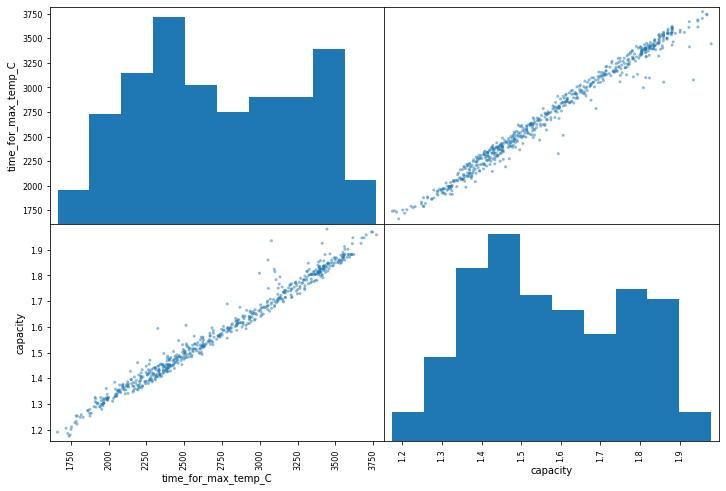

In [13]:
attributes = ['time_for_max_temp_C', 'capacity']
scatter_matrix(df_temp_24[attributes], figsize=(12,8))
plt.show()

### Ambient Temperature = 4C

In [14]:
df_temp_4.corr()

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,capacity,ambient_temp
time_for_max_temp_D,1.000000,0.809569,0.213456,-0.034824,0.100198,0.361708,-0.046922,NaN
max_temp_D,0.809569,1.000000,0.333342,-0.221409,-0.112564,0.275371,-0.045700,NaN
slope_temp_D,0.213456,0.333342,1.000000,-0.076486,-0.143095,0.086473,-0.055517,NaN
time_voltage_measured_below3_D,-0.034824,-0.221409,-0.076486,1.000000,0.327741,-0.146835,0.966607,NaN
slope_voltage_measured_D,0.100198,-0.112564,-0.143095,0.327741,1.000000,0.147687,-0.126335,NaN
time_for_max_temp_C,0.361708,0.275371,0.086473,-0.146835,0.147687,1.000000,-0.189824,NaN
capacity,-0.046922,-0.045700,-0.055517,0.966607,-0.126335,-0.189824,1.000000,NaN
ambient_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 4.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 4.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 4.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


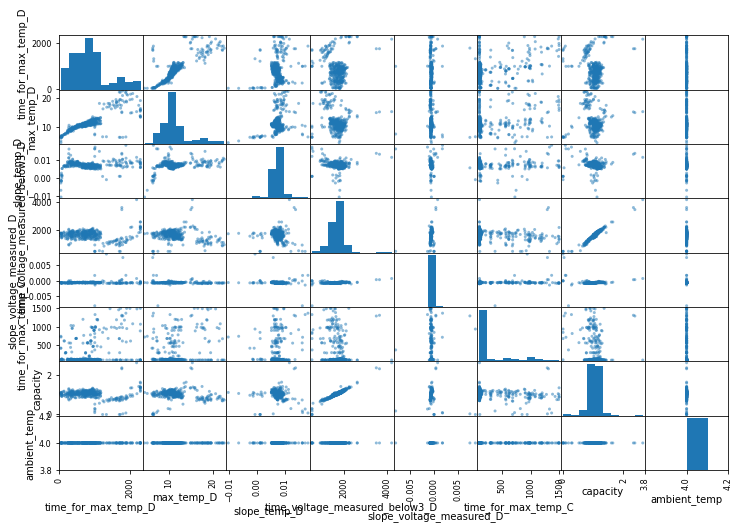

In [15]:
attributes = df_temp_4.columns
scatter_matrix(df_temp_4[attributes], figsize=(12,8))
plt.show()

In [16]:
df_temp_4.drop(['time_for_max_temp_C'], axis=1, inplace=True)
df_temp_4.dropna(inplace=True)
df_temp_4.reset_index(inplace=True)
df_temp_4

,index,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,cell,ambient_temp
0,0,1473.328,16.270513,0.007276,1217.453,-0.000205,0.858373,B0049,4
1,1,2291.062,13.741555,0.008361,2234.437,-0.000414,1.420906,B0049,4
2,2,2297.109,13.429040,0.007559,2240.031,-0.000571,1.372852,B0049,4
3,3,1769.031,14.962434,0.013949,3490.797,0.000369,2.378644,B0049,4
4,4,2197.344,20.530530,0.009691,1589.719,-0.000628,1.060536,B0049,4
...,...,...,...,...,...,...,...,...,...
350,424,1023.234,10.990051,0.005295,1783.172,-0.000514,1.153909,B0056,4
351,425,328.187,8.905384,0.007373,1828.187,-0.000570,1.130219,B0056,4
352,427,470.609,9.601768,0.006927,1799.062,-0.000531,1.143011,B0056,4
353,428,435.406,9.474135,0.007005,1812.281,-0.000524,1.137273,B0056,4


In [17]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=100, contamination=0.1, warm_start=True, random_state=42)
outlier_locs = clf.fit_predict(df_temp_4[['time_for_max_temp_D','max_temp_D','slope_temp_D', 'time_voltage_measured_below3_D', 'slope_voltage_measured_D','capacity']])  # fit the added trees 
print(outlier_locs)

[ 1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1 -1  1
 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1

In [18]:
indices = [i for i, x in enumerate(outlier_locs) if x == -1]
df_temp_4.drop(indices, inplace=True)
df_temp_4.corr()

,index,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,ambient_temp
index,1.000000,-0.448689,-0.605461,-0.408495,0.651795,0.558530,0.608123,NaN
time_for_max_temp_D,-0.448689,1.000000,0.930252,0.132917,-0.343993,-0.145994,-0.304122,NaN
max_temp_D,-0.605461,0.930252,1.000000,0.311205,-0.535537,-0.330558,-0.507001,NaN
slope_temp_D,-0.408495,0.132917,0.311205,1.000000,-0.196939,-0.224176,-0.247404,NaN
time_voltage_measured_below3_D,0.651795,-0.343993,-0.535537,-0.196939,1.000000,0.657405,0.961106,NaN
slope_voltage_measured_D,0.558530,-0.145994,-0.330558,-0.224176,0.657405,1.000000,0.720517,NaN
capacity,0.608123,-0.304122,-0.507001,-0.247404,0.961106,0.720517,1.000000,NaN
ambient_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 4.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 4.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 4.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


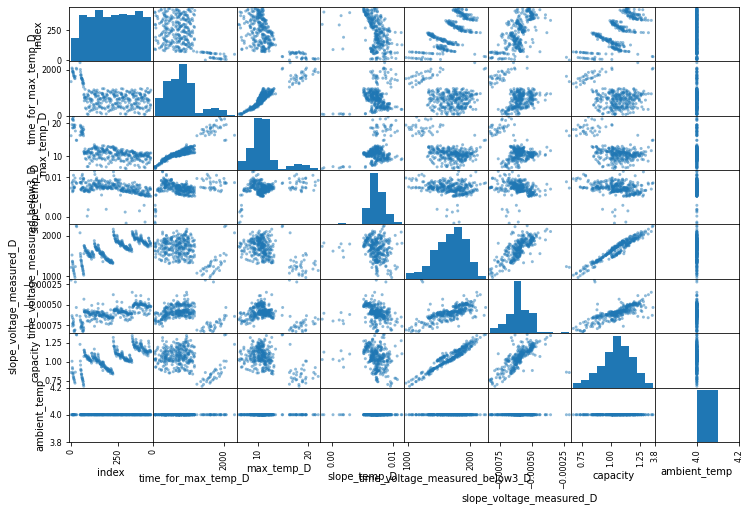

In [19]:
attributes = df_temp_4.columns
scatter_matrix(df_temp_4[attributes], figsize=(12,8))
plt.show()

In [20]:
df_temp_4

,index,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,cell,ambient_temp
0,0,1473.328,16.270513,0.007276,1217.453,-0.000205,0.858373,B0049,4
5,5,2063.219,19.605507,0.008495,1520.906,-0.000634,1.006993,B0049,4
7,7,2016.453,21.333412,0.008806,1368.016,-0.000658,0.923238,B0049,4
8,8,1905.922,18.650946,0.006333,1354.640,-0.000760,0.905328,B0049,4
9,9,1931.563,21.036787,0.006689,1318.563,-0.000734,0.859585,B0049,4
...,...,...,...,...,...,...,...,...,...
350,424,1023.234,10.990051,0.005295,1783.172,-0.000514,1.153909,B0056,4
351,425,328.187,8.905384,0.007373,1828.187,-0.000570,1.130219,B0056,4
352,427,470.609,9.601768,0.006927,1799.062,-0.000531,1.143011,B0056,4
353,428,435.406,9.474135,0.007005,1812.281,-0.000524,1.137273,B0056,4


# Categorical Features

In [21]:
df_temp_4.reset_index(inplace=True)
df_temp_4.drop(['level_0', 'index'], axis = 1, inplace=True)

In [22]:
df_temp_4

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,cell,ambient_temp
0,1473.328,16.270513,0.007276,1217.453,-0.000205,0.858373,B0049,4
1,2063.219,19.605507,0.008495,1520.906,-0.000634,1.006993,B0049,4
2,2016.453,21.333412,0.008806,1368.016,-0.000658,0.923238,B0049,4
3,1905.922,18.650946,0.006333,1354.640,-0.000760,0.905328,B0049,4
4,1931.563,21.036787,0.006689,1318.563,-0.000734,0.859585,B0049,4
...,...,...,...,...,...,...,...,...
314,1023.234,10.990051,0.005295,1783.172,-0.000514,1.153909,B0056,4
315,328.187,8.905384,0.007373,1828.187,-0.000570,1.130219,B0056,4
316,470.609,9.601768,0.006927,1799.062,-0.000531,1.143011,B0056,4
317,435.406,9.474135,0.007005,1812.281,-0.000524,1.137273,B0056,4


In [23]:
df_temp_24.reset_index(inplace=True)
df_temp_24.drop(['index'], axis = 1, inplace=True)

In [24]:
df_temp_24

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,capacity,cell,ambient_temp
0,3348.735,39.033398,0.004281,3269.688,-0.000341,3447.609,1.846327,B0005,24
1,3329.281,38.818797,0.004231,3250.437,-0.000341,3419.156,1.835349,B0005,24
2,3329.500,38.762305,0.004237,3250.563,-0.000342,3421.593,1.835263,B0005,24
3,3327.531,38.665393,0.004250,3248.766,-0.000342,3395.125,1.834646,B0005,24
4,3329.047,38.751695,0.004274,3250.203,-0.000340,3422.047,1.835662,B0005,24
...,...,...,...,...,...,...,...,...,...
611,2513.250,38.847490,0.006019,2375.953,-0.000462,2217.719,1.362737,B0018,24
612,2487.563,38.802834,0.005931,2377.500,-0.000462,2199.828,1.363405,B0018,24
613,2481.078,38.726991,0.006112,2343.109,-0.000463,2165.250,1.351865,B0018,24
614,2500.703,38.671920,0.006106,2348.656,-0.000465,2195.156,1.354797,B0018,24


In [25]:
df_all = pd.concat([df_temp_24, df_temp_4])
df_all.reset_index(inplace=True)
df_all.drop(['time_for_max_temp_C', 'index'], axis = 1, inplace=True)
df_all

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,cell,ambient_temp
0,3348.735,39.033398,0.004281,3269.688,-0.000341,1.846327,B0005,24
1,3329.281,38.818797,0.004231,3250.437,-0.000341,1.835349,B0005,24
2,3329.500,38.762305,0.004237,3250.563,-0.000342,1.835263,B0005,24
3,3327.531,38.665393,0.004250,3248.766,-0.000342,1.834646,B0005,24
4,3329.047,38.751695,0.004274,3250.203,-0.000340,1.835662,B0005,24
...,...,...,...,...,...,...,...,...
930,1023.234,10.990051,0.005295,1783.172,-0.000514,1.153909,B0056,4
931,328.187,8.905384,0.007373,1828.187,-0.000570,1.130219,B0056,4
932,470.609,9.601768,0.006927,1799.062,-0.000531,1.143011,B0056,4
933,435.406,9.474135,0.007005,1812.281,-0.000524,1.137273,B0056,4


In [26]:
df_onehot = pd.get_dummies(df_all.ambient_temp, prefix='ambient_temp')
df_all = df_all.join(df_onehot)
df_all.drop(['ambient_temp'], axis =1, inplace=True)

In [27]:
df_all

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,cell,ambient_temp_4,ambient_temp_24
0,3348.735,39.033398,0.004281,3269.688,-0.000341,1.846327,B0005,0,1
1,3329.281,38.818797,0.004231,3250.437,-0.000341,1.835349,B0005,0,1
2,3329.500,38.762305,0.004237,3250.563,-0.000342,1.835263,B0005,0,1
3,3327.531,38.665393,0.004250,3248.766,-0.000342,1.834646,B0005,0,1
4,3329.047,38.751695,0.004274,3250.203,-0.000340,1.835662,B0005,0,1
...,...,...,...,...,...,...,...,...,...
930,1023.234,10.990051,0.005295,1783.172,-0.000514,1.153909,B0056,1,0
931,328.187,8.905384,0.007373,1828.187,-0.000570,1.130219,B0056,1,0
932,470.609,9.601768,0.006927,1799.062,-0.000531,1.143011,B0056,1,0
933,435.406,9.474135,0.007005,1812.281,-0.000524,1.137273,B0056,1,0


In [28]:
df_all.corr()

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,ambient_temp_4,ambient_temp_24
time_for_max_temp_D,1.000000,0.939541,-0.633029,0.896886,0.835479,0.882854,-0.933735,0.933735
max_temp_D,0.939541,1.000000,-0.487705,0.797496,0.759377,0.772767,-0.988293,0.988293
slope_temp_D,-0.633029,-0.487705,1.000000,-0.746897,-0.711849,-0.760184,0.553700,-0.553700
time_voltage_measured_below3_D,0.896886,0.797496,-0.746897,1.000000,0.929569,0.996582,-0.844772,0.844772
slope_voltage_measured_D,0.835479,0.759377,-0.711849,0.929569,1.000000,0.935552,-0.805711,0.805711
capacity,0.882854,0.772767,-0.760184,0.996582,0.935552,1.000000,-0.822041,0.822041
ambient_temp_4,-0.933735,-0.988293,0.553700,-0.844772,-0.805711,-0.822041,1.000000,-1.000000
ambient_temp_24,0.933735,0.988293,-0.553700,0.844772,0.805711,0.822041,-1.000000,1.000000


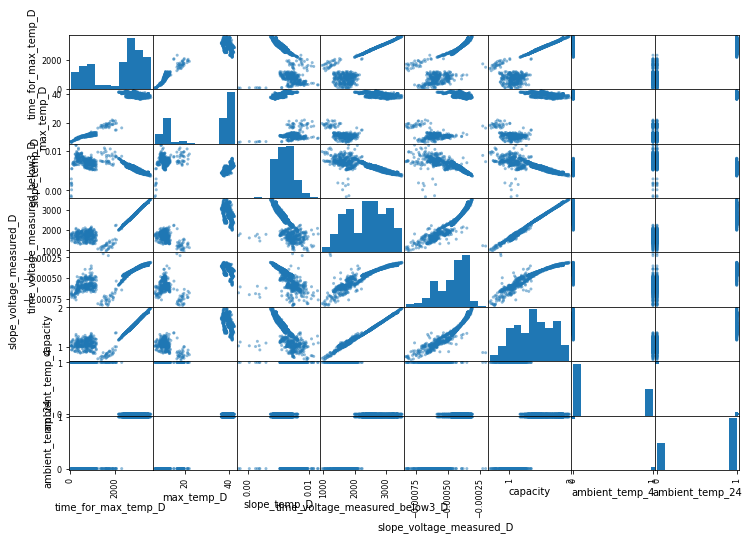

In [29]:
attributes = df_all.columns
scatter_matrix(df_all[attributes], figsize=(12,8))
plt.show()

In [30]:
i = df_all[df_all.cell == 'B0050'].index
df_all.drop(i, inplace=True)

In [31]:
df_all.reset_index(inplace=True)
df_all.drop(['index'], axis=1, inplace=True)
df_all # our final pandas df with right indexing 

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,cell,ambient_temp_4,ambient_temp_24
0,3348.735,39.033398,0.004281,3269.688,-0.000341,1.846327,B0005,0,1
1,3329.281,38.818797,0.004231,3250.437,-0.000341,1.835349,B0005,0,1
2,3329.500,38.762305,0.004237,3250.563,-0.000342,1.835263,B0005,0,1
3,3327.531,38.665393,0.004250,3248.766,-0.000342,1.834646,B0005,0,1
4,3329.047,38.751695,0.004274,3250.203,-0.000340,1.835662,B0005,0,1
...,...,...,...,...,...,...,...,...,...
927,1023.234,10.990051,0.005295,1783.172,-0.000514,1.153909,B0056,1,0
928,328.187,8.905384,0.007373,1828.187,-0.000570,1.130219,B0056,1,0
929,470.609,9.601768,0.006927,1799.062,-0.000531,1.143011,B0056,1,0
930,435.406,9.474135,0.007005,1812.281,-0.000524,1.137273,B0056,1,0


## Train/Val/Test Split

In [40]:
from sklearn.model_selection import train_test_split
df_train, df_val_test = train_test_split(df_all, test_size=0.4, random_state=42, stratify=df_all[['cell']])

In [41]:
print(len(df_train), len(df_val_test))

559 373


In [42]:
df_train.cell.value_counts()

B0005    100
B0007    100
B0006     93
B0018     77
B0056     49
B0054     48
B0055     47
B0053     25
B0051     12
B0049      8
Name: cell, dtype: int64

In [43]:
df_train.drop(['cell'], axis = 1, inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
df_train

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,ambient_temp_4,ambient_temp_24
667,46.500,6.936796,0.001782,1626.610,-0.000694,1.035222,1,0
479,2635.969,40.970636,0.006613,2481.234,-0.000441,1.416578,0,1
607,2532.578,37.882796,0.005859,2409.953,-0.000456,1.388249,0,1
208,3158.156,38.517007,0.004502,3073.703,-0.000344,1.744741,0,1
806,329.781,8.717408,0.008230,1833.360,-0.000606,1.079332,1,0
...,...,...,...,...,...,...,...,...
618,2016.453,21.333412,0.008806,1368.016,-0.000658,0.923238,1,0
603,2471.516,37.856579,0.006273,2333.547,-0.000462,1.346231,0,1
730,905.141,12.006256,0.007252,1502.063,-0.000619,0.952603,1,0
593,2578.781,37.890964,0.005749,2459.453,-0.000447,1.414787,0,1


In [45]:
df_val_test.cell.value_counts()

B0005    66
B0007    66
B0006    62
B0018    52
B0056    33
B0055    32
B0054    32
B0053    16
B0051     8
B0049     6
Name: cell, dtype: int64

In [46]:
df_val, df_test = train_test_split(df_val_test, test_size=0.5, random_state=42, stratify=df_val_test[['cell']])

In [47]:
df_val.drop(['cell'], axis = 1, inplace=True)
df_test.drop(['cell'], axis = 1, inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
X_train_num = df_train.drop(['capacity', 'ambient_temp_4', 'ambient_temp_24'], axis=1)
X_train_cat = df_train[['ambient_temp_4', 'ambient_temp_24']]
y_train = df_train.capacity
X_val_num = df_val.drop(['capacity', 'ambient_temp_4', 'ambient_temp_24'], axis=1)
X_val_cat = df_val[['ambient_temp_4', 'ambient_temp_24']]
y_val = df_val.capacity
X_test_num = df_test.drop(['capacity', 'ambient_temp_4', 'ambient_temp_24'], axis=1)
X_test_cat = df_test[['ambient_temp_4', 'ambient_temp_24']]
y_test = df_test.capacity

## Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler

# Temperature can be scaled even though it is a categorical variable, as we only have two discrete values
scaler = StandardScaler()
X_train_scaled_num = scaler.fit_transform(X_train_num)
X_test_scaled_num = scaler.transform(X_test_num)
X_val_scaled_num = scaler.transform(X_val_num)

In [50]:
import joblib 
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [51]:
#Combining numerical and categorical x data:
X_train_scaled = np.concatenate((X_train_scaled_num, X_train_cat.to_numpy()), axis=1)
X_val_scaled = np.concatenate((X_val_scaled_num, X_val_cat.to_numpy()), axis=1)
X_test_scaled = np.concatenate((X_test_scaled_num, X_test_cat.to_numpy()), axis=1)

In [52]:
X_train_scaled

array([[-1.97847283, -1.70533966, -2.92552403, ..., -1.95334674,
         1.        ,  0.        ],
       [ 0.43501053,  0.8086256 ,  0.3438466 , ...,  0.23654767,
         0.        ,  1.        ],
       [ 0.3386462 ,  0.5805373 , -0.16642651, ...,  0.11324479,
         0.        ,  1.        ],
       ...,
       [-1.17818684, -1.33087575,  0.77600161, ..., -1.30831515,
         1.        ,  0.        ],
       [ 0.38170915,  0.58114059, -0.24115826, ...,  0.18526324,
         0.        ,  1.        ],
       [ 0.52854893,  0.80387722,  0.09205207, ...,  0.40997437,
         0.        ,  1.        ]])

## Model Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

We perform an initial test using default hyperparameters with all the regressors.

In [45]:
forest_reg = RandomForestRegressor(random_state=42)
extra_reg = ExtraTreesRegressor(random_state=42)
lin_reg = LinearRegression()
elastic_reg = ElasticNet(random_state=42)
lgbm_reg = LGBMRegressor(random_state=42)
xgb_reg = XGBRegressor()
svm_reg = SVR(kernel='linear')
kn_reg = KNeighborsRegressor()


In [46]:
regressor_list = [forest_reg, extra_reg, lin_reg, elastic_reg, lgbm_reg, xgb_reg, svm_reg, kn_reg]
regressor_names = ['random forest', 'extra trees', 'linear regression', 'elastic net', 'lgbm', 'xgb', 'svm', 'KNeighbour']
for regressor, name in zip(regressor_list, regressor_names):
    cv = cross_val_score(regressor, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-cv)
    print('name:{}, scores:{}, mean:{}'.format(name, rmse_scores, rmse_scores.mean()))

name:random forest, scores:[0.01689393 0.02036672 0.02285043 0.02295659 0.01581603], mean:0.019776741610208596
name:extra trees, scores:[0.01439985 0.01719761 0.02092114 0.0191163  0.01466589], mean:0.01726015741022969
name:linear regression, scores:[0.01876973 0.01870047 0.02343028 0.02208255 0.01958226], mean:0.0205130569133138
name:elastic net, scores:[0.26625854 0.31988888 0.29380265 0.31488326 0.30874328], mean:0.3007153218529238
name:lgbm, scores:[0.02081035 0.02689528 0.02198716 0.02195909 0.01962995], mean:0.022256367638502327
name:xgb, scores:[0.01955907 0.0223347  0.02510062 0.0234106  0.01709185], mean:0.021499368053925362
name:svm, scores:[0.05357042 0.05544101 0.0520452  0.04997558 0.04541066], mean:0.05128857521785862
name:KNeighbour, scores:[0.02496784 0.03463272 0.03270974 0.02981731 0.03065686], mean:0.030556892824607586


In [48]:
forest_reg.fit(X_train_scaled, y_train)
feature_importances = forest_reg.feature_importances_
feature_names = X_train_num.columns.tolist() + X_train_cat.columns.tolist()
for importance, name in zip(feature_importances, feature_names):
    print('name:{}, importance:{}'.format(name, importance))

name:time_for_max_temp_D, importance:0.25723468099692637
name:max_temp_D, importance:0.0005483033112661322
name:slope_temp_D, importance:0.00086060416330109
name:time_voltage_measured_below3_D, importance:0.7360144772667354
name:slope_voltage_measured_D, importance:0.0053242529476136835
name:ambient_temp_4, importance:8.730500500315335e-06
name:ambient_temp_24, importance:8.950813657076925e-06


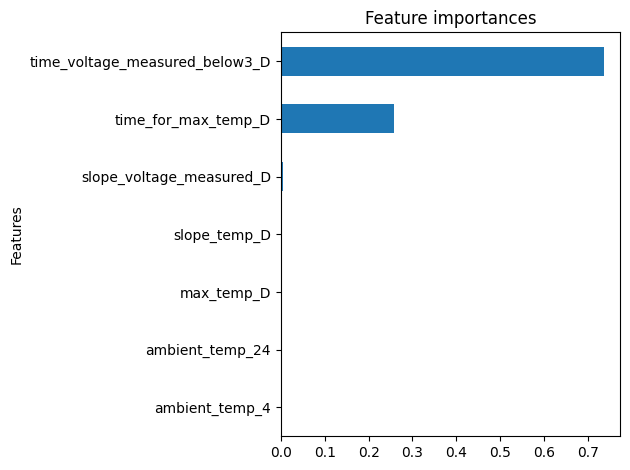

In [56]:
forest_importances = pd.Series(feature_importances, index=feature_names)
forest_importances.sort_values(ascending=True, inplace=True)

fig, ax = plt.subplots()
forest_importances.plot.barh(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Features")
fig.tight_layout()
plt.show()

## Hyperparameter Tuning

Based on our initial analysis, it appears as though the forest and gradient-boosting based regressors performed the best. We'll tune these further.

### Random Forest

In [216]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

from pprint import pprint
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, random_state=42, cv = 3, n_jobs = -1)
rf_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   47.5s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_estimator_
# RandomForestRegressor(max_depth=100, n_estimators=1400, random_state=42)

RandomForestRegressor(max_depth=100, n_estimators=1400, random_state=42)

In [285]:
from sklearn.metrics import mean_squared_error

def evaluate(model, val_features, val_labels):
    predictions = model.predict(val_features)
    errors = np.sqrt(mean_squared_error(val_labels, predictions))
    print('Model Performance')
    print('Average Error: {:0.10f} Ah'.format(errors))

base_model = RandomForestRegressor(random_state = 42)
base_model.fit(X_train_scaled, y_train)
evaluate(base_model, X_val_scaled, y_val)

best_random = RandomForestRegressor(max_depth=100, n_estimators=1400, random_state=42)
best_random.fit(X_train_scaled, y_train)
evaluate(best_random, X_val_scaled, y_val)


Model Performance
Average Error: 0.0181120658 Ah
Model Performance
Average Error: 0.0181525930 Ah


In [286]:
#Further narrow down using grid search

n_estimators = [1300, 1350, 1400, 1450, 1500]
max_features = [6, 7]
max_depth = [90, 100, 110]
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2, 3]
bootstrap = [True]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [ ]:
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(estimator = rf, param_grid =param_grid, cv = 3, n_jobs = -1)
rf_grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  3.3min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [90, 100, 110],
                         'max_features': [6, 7], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [1300, 1350, 1400, 1450, 1500]},
             verbose=2)

In [ ]:
rf_grid.best_params_
'''
{'bootstrap': True,
 'max_depth': 90,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1300}
'''

"\n{'bootstrap': True,\n 'max_depth': 90,\n 'max_features': 6,\n 'min_samples_leaf': 1,\n 'min_samples_split': 2,\n 'n_estimators': 1300}\n"

In [287]:
grid_rf = RandomForestRegressor(max_depth=90, max_features=6, min_samples_leaf=1, min_samples_split = 2, n_estimators=1300)
grid_rf.fit(X_train_scaled, y_train)
evaluate(grid_rf, X_val_scaled, y_val)

Model Performance
Average Error: 0.0178881591 Ah


## Extra Trees

In [288]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

from pprint import pprint
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
et = ExtraTreesRegressor(random_state=42)
et_random = RandomizedSearchCV(estimator = et, param_distributions = random_grid, n_iter = 100, random_state=42, cv = 3, n_jobs = -1)
et_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   35.5s finished


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
et_random.best_estimator_
# ExtraTreesRegressor(max_depth=20, n_estimators=1800, random_state=42)

ExtraTreesRegressor(max_depth=20, n_estimators=1800, random_state=42)

In [290]:
base_model = ExtraTreesRegressor(random_state = 42)
base_model.fit(X_train_scaled, y_train)
evaluate(base_model, X_val_scaled, y_val)

best_random = ExtraTreesRegressor(max_depth=20, n_estimators=1800, random_state=42)
best_random.fit(X_train_scaled, y_train)
evaluate(best_random, X_val_scaled, y_val)

Model Performance
Average Error: 0.0172353752 Ah
Model Performance
Average Error: 0.0163841451 Ah


In [291]:
n_estimators = [1600, 1700, 1750, 1800, 1850, 1900, 2000]
max_features = [4, 5, 6, 7]
max_depth = [10, 15, 20, 25, 30, 40]
min_samples_split = [2]
min_samples_leaf = [1, 2]
bootstrap = [True]
et_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
et_grid = GridSearchCV(estimator = et, param_grid =et_grid, cv = 3, n_jobs = -1)
et_grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 336 candidates, totalling 1008 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1008 out of 1008 | elapsed:  4.3min finished


GridSearchCV(cv=3, estimator=ExtraTreesRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [10, 15, 20, 25, 30, 40],
                         'max_features': [4, 5, 6, 7],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [2],
                         'n_estimators': [1600, 1700, 1750, 1800, 1850, 1900,
                                          2000]},
             verbose=2)

In [ ]:
et_grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1600}

In [292]:
base_model = ExtraTreesRegressor(random_state = 42)
base_model.fit(X_train_scaled, y_train)
evaluate(base_model, X_val_scaled, y_val)

best_random = ExtraTreesRegressor(max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, random_state=42)
best_random.fit(X_train_scaled, y_train)
evaluate(best_random, X_val_scaled, y_val)

Model Performance
Average Error: 0.0172353752 Ah
Model Performance
Average Error: 0.0163491689 Ah


### xgboost

In [293]:
n_estimators = range(50,400,5)
eta = [0.1, 0.2, 0.3, 0.5]
gamma = [0, 0.5, 1, 1.5, 2]
max_depth = [3,4,5,6,7,8,9,10]
min_child_weight = [0.01, 0.05, 0.1]
reg_lambda= [0.5, 1, 2]
reg_alpha = [0, 1, 2]
colsample_bytree = [0.8, 0.9, 1]
xgb_grid = {'eta': eta,
               'gamma': gamma,
               'max_depth': max_depth,
               'min_child_weight': min_child_weight,
               'reg_lambda':reg_lambda,
               'reg_alpha': reg_alpha,
               'colsample_bytree':colsample_bytree,
               'n_estimators':n_estimators}

In [ ]:
xgb_base = XGBRegressor()
xgb_random = RandomizedSearchCV(xgb_base, param_distributions=xgb_grid, n_iter=200, cv=3, n_jobs=1, random_state=42)
xgb_random.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [ ]:
xgb_random.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=4,
             min_child_weight=0.01, missing=nan, monotone_constraints='()',
             n_estimators=270, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [294]:
base_model = XGBRegressor(random_state = 42)
base_model.fit(X_train_scaled, y_train)
evaluate(base_model, X_val_scaled, y_val)

best_random = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=4,
             min_child_weight=0.01, monotone_constraints='()',
             n_estimators=270, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
best_random.fit(X_train_scaled, y_train)
evaluate(best_random, X_val_scaled, y_val)

Model Performance
Average Error: 0.0189796659 Ah
Model Performance
Average Error: 0.0181007296 Ah


In [295]:
n_estimators = [300, 400, 500]
eta = [0.15,0.2, 0.25]
gamma = [0, 0.1]
max_depth = [6,7,8]
min_child_weight = [0.01]
reg_lambda= [0, 0.5, 1, 5, 10]
reg_alpha = [0, 0.5, 1]
colsample_bytree = [1]
xgb_grid = {'eta': eta,
               'gamma': gamma,
               'max_depth': max_depth,
               'min_child_weight': min_child_weight,
               'reg_lambda':reg_lambda,
               'reg_alpha': reg_alpha,
               'colsample_bytree':colsample_bytree,
               'n_estimators':n_estimators}

xgb_grid = GridSearchCV(estimator = xgb_base, param_grid =xgb_grid, cv = 3, verbose=1, n_jobs = 1)
xgb_grid.fit(X_train_scaled, y_train)

NameError: name 'xgb_base' is not defined

In [ ]:
xgb_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.15, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.150000006, max_delta_step=0, max_depth=8,
             min_child_weight=0.01, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [296]:
best_random = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.15, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.150000006, max_delta_step=0, max_depth=8,
             min_child_weight=0.01, monotone_constraints='()',
             n_estimators=300, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
best_random.fit(X_train_scaled, y_train)
evaluate(best_random, X_val_scaled, y_val)

Model Performance
Average Error: 0.0191609500 Ah


## Linear Regression

In [ ]:
base_linreg = LinearRegression()
base_linreg.fit(X_train_scaled, y_train)
evaluate(base_linreg, X_val_scaled, y_val)

Model Performance
Average Error: 0.0198383822 Ah


## Voting Regressor

In [297]:
from sklearn.ensemble import VotingRegressor
best_rf_reg = RandomForestRegressor(max_depth=100, n_estimators=1400, random_state=42)
best_et_reg = ExtraTreesRegressor(max_depth=15, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, random_state=42)
best_xgb_reg = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.15, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.150000006, max_delta_step=0, max_depth=8,
             min_child_weight=0.01, monotone_constraints='()',
             n_estimators=300, n_jobs=12, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
# TODO decide on the weights of each regressor
voting_reg = VotingRegressor(estimators=[('rf', best_rf_reg), ('et', best_et_reg), ('xgb', best_xgb_reg)])
params = {'weights':[[3,20,3],[1, 30, 1]]}
grid_Search = GridSearchCV(param_grid = params, estimator=voting_reg, cv = 3, verbose=1, n_jobs = 1)
grid_Search.fit(X_train_scaled,y_train)
#voting_reg.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   15.3s finished


GridSearchCV(cv=3,
             estimator=VotingRegressor(estimators=[('rf',
                                                    RandomForestRegressor(max_depth=100,
                                                                          n_estimators=1400,
                                                                          random_state=42)),
                                                   ('et',
                                                    ExtraTreesRegressor(max_depth=15,
                                                                        max_features=7,
                                                                        n_estimators=1600,
                                                                        random_state=42)),
                                                   ('xgb',
                                                    XGBRegressor(base_score=0.5,
                                                                 booster='gbtree',
           

In [298]:
best_voting_reg = VotingRegressor(estimators=[('rf', best_rf_reg), ('et', best_et_reg), ('xgb', best_xgb_reg)], weights=[3,20,3])
best_voting_reg.fit(X_train_scaled, y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=100,
                                                   n_estimators=1400,
                                                   random_state=42)),
                            ('et',
                             ExtraTreesRegressor(max_depth=15, max_features=7,
                                                 n_estimators=1600,
                                                 random_state=42)),
                            ('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, eta=0.15, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          le

In [299]:
evaluate(best_voting_reg, X_val_scaled, y_val)

Model Performance
Average Error: 0.0162754005 Ah


## Evaluation

We can evaluate our final voting regressor, as well as the random forest, extra trees, and XGBoost regressors, on the final test set.

In [300]:
final_models = [best_rf_reg, best_et_reg, best_xgb_reg, best_voting_reg]
names = ['random forest', 'extra trees', 'XGBoost', 'voting regressor']
best_rf_reg.fit(X_train_scaled, y_train)
best_et_reg.fit(X_train_scaled, y_train)
best_xgb_reg.fit(X_train_scaled, y_train)
for model, name in zip(final_models, names):
    print(name)
    evaluate(model, X_test_scaled, y_test)

random forest
Model Performance
Average Error: 0.0171322217 Ah
extra trees
Model Performance
Average Error: 0.0162820016 Ah
XGBoost
Model Performance
Average Error: 0.0163331179 Ah
voting regressor
Model Performance
Average Error: 0.0159877132 Ah


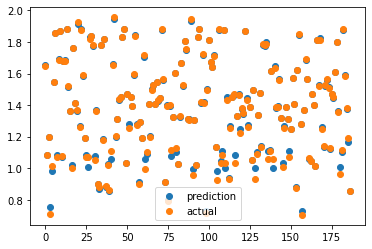

In [301]:
voting_predictions = best_voting_reg.predict(X_test_scaled)

x = np.arange(0, len(y_test))
plt.scatter(x, voting_predictions, label='prediction')
plt.scatter(x, y_test, label='actual')
plt.legend()
plt.show()

In [302]:
y_test.index

Int64Index([536, 801, 316, 629, 678, 426, 346, 810, 385, 344,
            ...
            529,  17, 281, 724, 914, 341, 221, 584, 874, 769],
           dtype='int64', length=187)

In [303]:
df_y_test = y_test.to_frame()
df_y_test['predictions'] = voting_predictions
df_y_test.rename(columns = {'capacity':'capdrop'}, inplace=True)
df_y_test.head()

,capdrop,predictions
536,1.646834,1.654230
801,1.081326,1.084100
316,1.200894,1.200745
629,0.709395,0.754321
678,1.015038,0.983783


In [304]:
df_eval = pd.concat([df_all, df_y_test], axis = 1)
df_eval.drop(df_eval.columns[-2], axis = 1, inplace=True)
df_eval

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,cell,ambient_temp_4,ambient_temp_24,predictions
0,3348.735,39.033398,0.004281,3269.688,-0.000341,1.846327,B0005,0,1,NaN
1,3329.281,38.818797,0.004231,3250.437,-0.000341,1.835349,B0005,0,1,NaN
2,3329.500,38.762305,0.004237,3250.563,-0.000342,1.835263,B0005,0,1,NaN
3,3327.531,38.665393,0.004250,3248.766,-0.000342,1.834646,B0005,0,1,NaN
4,3329.047,38.751695,0.004274,3250.203,-0.000340,1.835662,B0005,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
929,1023.234,10.990051,0.005295,1783.172,-0.000514,1.153909,B0056,1,0,NaN
930,328.187,8.905384,0.007373,1828.187,-0.000570,1.130219,B0056,1,0,1.106469
931,470.609,9.601768,0.006927,1799.062,-0.000531,1.143011,B0056,1,0,NaN
932,435.406,9.474135,0.007005,1812.281,-0.000524,1.137273,B0056,1,0,NaN


In [65]:
#joblib.dump(best_rf_reg, "best_rf.pkl")
#joblib.dump(best_et_reg, "best_et.pkl")
#joblib.dump(best_xgb_reg, "best_xgb.pkl")

['best_xgb.pkl']

In [80]:
joblib.dump(best_voting_reg, "best_voting.pkl")

['best_voting.pkl']